# Data Science Project: Joshua Gordon *332307073*

# Contents:
* classification model
* * KNN model to predict a given year 2015 - 2019
* * In this project we merged 5 data sets and added the year the survay was taken in
* * another "sexier" modlel predicting GDP

* * Logistic regression model

* regression model
* * predicting the writing score on a test

## part one: Classification model

##### goals:
* ***importing and anaylizing data, understanding what we are working with***
* ***data cleaning***
* ***spliting the data to test and train sets***
* ***maximizing our models accuracy***

#### *importing and anaylizing data, understanding what we are working with*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_2019 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2019.csv')

df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## We have managed to import our dataset of world happines report 2019

#### After importing our data I have stummbled across another 4 data sets from previose years (2015 - 2018).
#### We shall import all these five data sets and proced to clean the data one data set at a time in order to hopfully merge all the data sets

In [2]:
df_2019['year'] = 2019

cols_lst = ['Overall rank', 'Country or region', 'Score', 'GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'year']

df_2019.columns = cols_lst

df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


#### *We shall add a column for each dataset with the year the data was recorded. we shall then try build a classifiction modle* 
#### *that will correctly prredict the year of a given data sample.*

#### *An imortant part of the data cleaning prossess is to make sure all 5 datasets have the same headings we there for shall drop heading that are unique and keep only the headings and data that all 5 data sets share.

In [3]:
df_2018 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2018.csv')
df_2018['year'] = 2018

df_2018.columns = cols_lst

df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [4]:
df_2017 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2017.csv')


df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


#### *We can clearly see here that we have irrelivant data that is not shared with our previouse data sets. we shall there for drop them as they are irrelivant for our task at hand*

In [5]:
df_2017['year'] = 2017
df_2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1, inplace=True)

temp_lst = list(df_2017)


col_Titles=["Happiness.Rank","Country"] + temp_lst[2:]


df_2017=df_2017.reindex(columns=col_Titles)

df_2017.columns = cols_lst

df_2017.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [6]:
df_2016 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2016.csv')

df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


#### *We can clearly see here that we have irrelivant data that is not shared with our previouse data sets. we shall there for drop them as they are irrelivant for oour task at hand*

In [7]:
df_2016['year'] = 2016
df_2016.drop(['Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual','Region'] ,axis = 1,inplace=True)

temp_lst = list(df_2016)

col_Titles = ["Happiness Rank","Country"] + temp_lst[2:]

df_2016 = df_2016.reindex(columns=col_Titles)
df_2016.columns = cols_lst

df_2016.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,2,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,3,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,4,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,5,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [8]:
df_2015 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2015.csv')

df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### *We can clearly see here that we have irrelivant data that is not shared with our previouse data sets. we shall there for drop them as they are irrelivant for oour task at hand*

In [11]:
df_2015['year'] = 2015
lst = list(df_2015)
df_2015.drop([lst[1], lst[4], lst[-2]], axis = 1, inplace=True)

lst = list(df_2015)
col_Titles = ["Happiness Rank", "Country"] + lst[2:]

df_2015 = df_2015.reindex(columns=col_Titles)
df_2015.columns = cols_lst

df_2015.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


## data cleaning

#### *We have successfuly manged to import and clean our 5 data sets in order to merge the data sets in to one big data frame*

In [12]:
all_years_data = [df_2019, df_2018, df_2017, df_2016, df_2015]

df = pd.concat(all_years_data)

df.head(1000)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.34000,1.58700,0.98600,0.59600,0.15300,0.39300,2019
1,2,Denmark,7.600,1.38300,1.57300,0.99600,0.59200,0.25200,0.41000,2019
2,3,Norway,7.554,1.48800,1.58200,1.02800,0.60300,0.27100,0.34100,2019
3,4,Iceland,7.494,1.38000,1.62400,1.02600,0.59100,0.35400,0.11800,2019
4,5,Netherlands,7.488,1.39600,1.52200,0.99900,0.55700,0.32200,0.29800,2019
...,...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,2015
154,155,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,2015
155,156,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,2015
156,157,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,2015


## ***Above we have used the shape function and can conclude that we have 10 features ad 782 rows of data***

# Lets make sure we understand all our features:
### overall rank: the rank of that year out of all the countrys
### country of region: the country that was ranked
### score: the overall score 
### GDP per capita: Gross domestic product final good and services produced value
### socail support: the score for social support
### healthy life expectancy: the score for life expectancy 
### freedom of choices: the score for freedom
### generosity: the score on the survay for generosity
### Perceptions of corruption: score for perceptions of corruption
### year: the year the surrvay was done in

In [13]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.178526,0.165536,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.119115,0.127410,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.084860,0.067860,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.155219,0.128000,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.246864,0.236930,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.819710,2019.000000


#### *We have merged the data and got a quick description of our new 5 in 1 data set*

In [15]:
df.isnull().sum()
#checking to see which values are null

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
year                            0
dtype: int64

#### Checking for null values as this could mess around later on when we try and make a modle

In [16]:
df['Perceptions of corruption'] = df['Perceptions of corruption'].fillna(0)

#### ***fillling missing values***

In [17]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
year                            0
dtype: int64

#### Fixing the null values and double checking see have corrected the data

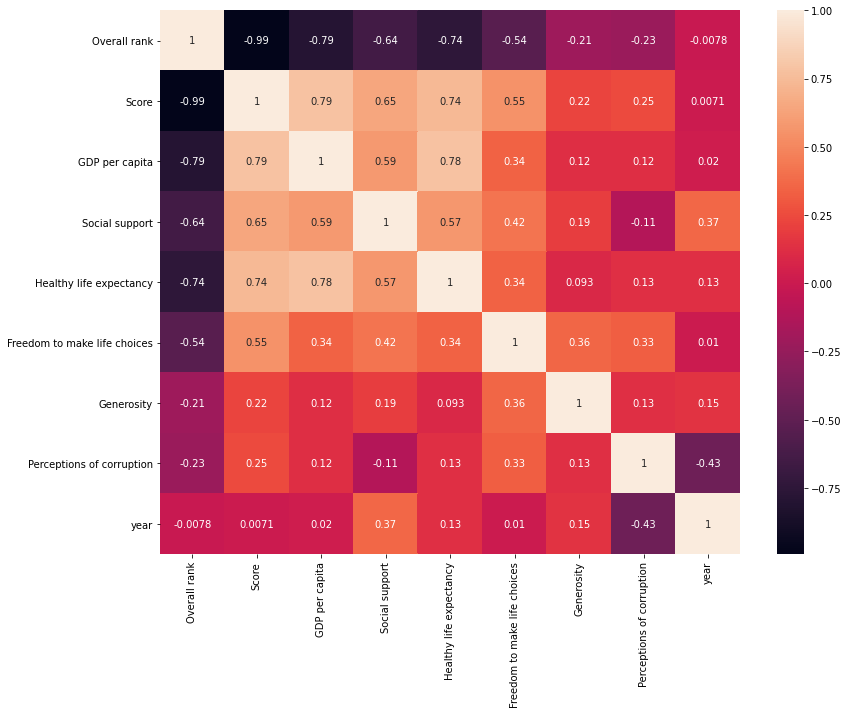

In [18]:
import seaborn as sns

plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot = True);

In [19]:
df.corr()['year']

Overall rank                   -0.007768
Score                           0.007065
GDP per capita                  0.019768
Social support                  0.367431
Healthy life expectancy         0.130302
Freedom to make life choices    0.010353
Generosity                      0.150721
Perceptions of corruption      -0.427954
year                            1.000000
Name: year, dtype: float64

# Important Analiysis

* ***Let us notic that our countrys have not shown up in the correlation graph as they are objects of the type String and we would need to manually make them in to numric values***

### ***most importantly we shall notice that there is a weak correlation between the feature year and the other features. We can there for expect for our modle to have a lower accuracy score than if the features were highly correlated***

# spliting the data to test and train sets

In [20]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['year']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)


score = classifier.score(X_test, y_test)
print(score)

0.10191082802547771


## ***We have imported our clasifier model and split our data in to training and testing sets using the standard 20/80 split. We then defined a clasifier of the type KNN and fitted our modle with our training sets using the standard 5 knn***

### We want our model to recive all the other 9 features and predict the year the survey was taken in

### We used our score metric on the test sets and our classifier scores with around 10.19% accuracy

## this isnt supprising right? I mean we knew from the corrolation heatmap that our classifier's accuracy woudnt be as high due to the correlation of the features. But its still worth somthing right? I mean all this hard work it has to be worth somthing and 10.19% isnt that bad right?

# WRONG!

### let me explain.

## ***I would like to introduce our dummy clasifier***

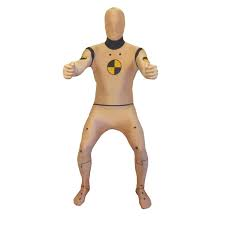

### *A dummy clasifier is a benchmark that if not passed we could all agree that our model is usless.*

## ***Lets clarify our dummy clasifier***

### We can say our clasifier is trying to predict a given year OUT OF 5 years. Meaning there are 5 options and no more than 5. We can therefor say that a "Dummy classifier" has a 0.2 chance of gussing the right answer. In other words anything below 20.00% is usless as any "Dummy" could just print the most freqent year and produce better results.

### therefor we come to a conclusion that our model (for the moment) is usless

In [29]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')

dummy_clf.score(X_train, y_train)

0.2032

# above we have imported sklearns dummy classifier to generate our dummy classifier. however we thought given the survey was given to a certain amount of countrys each year we came to the conclusion that the dummy classifier would be 20% (1 out of the 5 years) so why is it that its 20.32%?

In [23]:
lst = [df_2015, df_2016, df_2017, df_2018, df_2019]
maxi = 0
sumi = 0
year = 2015 - 1
for i in lst:
    shape = list(i.shape)
    print(shape)
    sumi+=shape[0]
    if(shape[0]>maxi):
        maxi = shape[0]
        year+=1


        
print("the class weights are not even, meaning we assumed wrong and each year not all countrys participated in the survay")
print("our max amount of countrys survayed in year: " , year , "with the amount of: " , maxi , " with a total of " , sumi )

print("we can there for say the correct dummy classifier is indeed: ",maxi ,"/" , sumi ," = " , maxi/(sumi))
     


[158, 10]
[157, 10]
[155, 10]
[156, 10]
[156, 10]
the class weights are not even, meaning we assumed wrong and each year not all countrys participated in the survay
our max amount of countrys survayed in year:  2015 with the amount of:  158  with a total of  782
we can there for say the correct dummy classifier is indeed:  158 / 782  =  0.2020460358056266


### ***Because we merged 5 data sets and not all the data sets had the same amount of data we were abit off with our dummy classifier estimate. However our dummy clasifier is 20.32% meaning anything below or eqaul is usless***

In [30]:
countrys = list(df['Country or region'].unique())

nums = list(range(1,len(countrys)))


dic = dict(zip(countrys, nums))

print(dic)

{'Finland': 1, 'Denmark': 2, 'Norway': 3, 'Iceland': 4, 'Netherlands': 5, 'Switzerland': 6, 'Sweden': 7, 'New Zealand': 8, 'Canada': 9, 'Austria': 10, 'Australia': 11, 'Costa Rica': 12, 'Israel': 13, 'Luxembourg': 14, 'United Kingdom': 15, 'Ireland': 16, 'Germany': 17, 'Belgium': 18, 'United States': 19, 'Czech Republic': 20, 'United Arab Emirates': 21, 'Malta': 22, 'Mexico': 23, 'France': 24, 'Taiwan': 25, 'Chile': 26, 'Guatemala': 27, 'Saudi Arabia': 28, 'Qatar': 29, 'Spain': 30, 'Panama': 31, 'Brazil': 32, 'Uruguay': 33, 'Singapore': 34, 'El Salvador': 35, 'Italy': 36, 'Bahrain': 37, 'Slovakia': 38, 'Trinidad & Tobago': 39, 'Poland': 40, 'Uzbekistan': 41, 'Lithuania': 42, 'Colombia': 43, 'Slovenia': 44, 'Nicaragua': 45, 'Kosovo': 46, 'Argentina': 47, 'Romania': 48, 'Cyprus': 49, 'Ecuador': 50, 'Kuwait': 51, 'Thailand': 52, 'Latvia': 53, 'South Korea': 54, 'Estonia': 55, 'Jamaica': 56, 'Mauritius': 57, 'Japan': 58, 'Honduras': 59, 'Kazakhstan': 60, 'Bolivia': 61, 'Hungary': 62, 'Para

### ***let us try improve our modle by adding the countrys, above we have made two lists: one of countrys and the other of numbers 1 - 169 representing all the countrys. we have merged them in to a dictinary and will add the new values to our dataset***

In [31]:
df['Country of region to num'] = df['Country or region'].map(dic)
df.head(1000)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Country of region to num
0,1,Finland,7.769,1.34000,1.58700,0.98600,0.59600,0.15300,0.39300,2019,1.0
1,2,Denmark,7.600,1.38300,1.57300,0.99600,0.59200,0.25200,0.41000,2019,2.0
2,3,Norway,7.554,1.48800,1.58200,1.02800,0.60300,0.27100,0.34100,2019,3.0
3,4,Iceland,7.494,1.38000,1.62400,1.02600,0.59100,0.35400,0.11800,2019,4.0
4,5,Netherlands,7.488,1.39600,1.52200,0.99900,0.55700,0.32200,0.29800,2019,5.0
...,...,...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,2015,152.0
154,155,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,2015,102.0
155,156,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,2015,149.0
156,157,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,2015,145.0


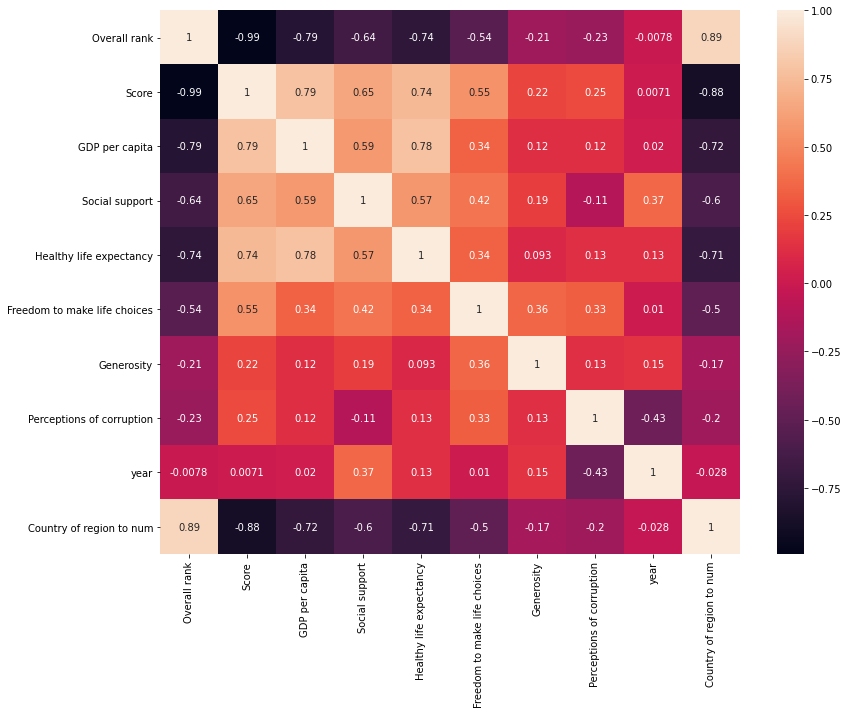

In [32]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot = True);

## ***Here we can see that our countrys of region to num has been inserted to our correlation heatmap***

In [33]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
year                            0
Country of region to num        1
dtype: int64

In [34]:
df['Country of region to num'] = df['Country of region to num'].fillna(0)
#fillling missing values

#### filling null values to ensure our data stays clean and workable

In [35]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption','Country of region to num']]
y = df['year']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print(score)


0.2356687898089172


## ***well above we can see that we have inproved our classifier by over 10%! and we have now past our dummy clasifier meaning we are not usless! YAY :)***

#### lets see what test size would give us the best accuracy score! so we can improve our 23.5%

In [36]:
lst_max_test_size = []
for i in np.arange(0.1,1,0.01):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state = 0)

    classifier = KNeighborsClassifier(n_neighbors = 5)

    classifier.fit(X_train, y_train)

    score = classifier.score(X_test, y_test)
    
    lst_max_test_size.append(score)


### Above we have performed a loop starting from a test size of 10% and moving up 1% each new classifer, all our score results have been appended to a list

Text(0.5, 1.0, 'accuracy as a function of test size')

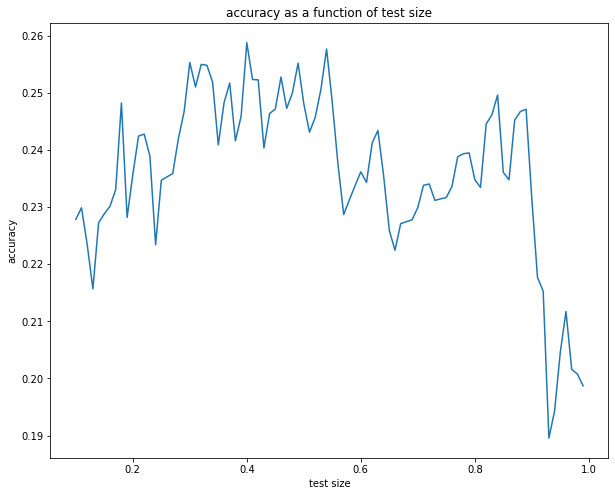

In [38]:
plt.figure(figsize=(10,8))

plt.plot(np.arange(0.1,1,0.01),lst_max_test_size)
plt.xlabel("test size")
plt.ylabel("accuracy")
plt.title("accuracy as a function of test size")

In [40]:
best_test_size = 0.1
accuracy_max = max(lst_max_test_size)
for i in lst_max_test_size:
    if(i == accuracy_max):
        save = best_test_size
    best_test_size += 0.01
print(save)

0.40000000000000024


#### Good work so far. we have ploted a graph showing all the results from our loops we an clearly see that at a test size of 40% (0.4 on the graph) we will revice the maximin resluts. lets apply this

In [41]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption','Country of region to num']]
y = df['year']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)


print(score)



0.25878594249201275


### Boom! from 23.56% to 25.87% thats a nice increase. let us try adjust our k value for our KNN in order to maximize even more our clasifier

In [42]:
lst_max_knn = []
for i in np.arange(1,50):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

    classifier = KNeighborsClassifier(n_neighbors = i)

    classifier.fit(X_train, y_train)

    score = classifier.score(X_test, y_test)
    
    lst_max_knn.append(score)


### ***Above we have yet again loops this time for 50 times and split the data with a 40/60 split test (As we saw this gives us the best results) only this time each loop the number of neigbors will be ajusted from 1 to 50. the results will be stored in a list and we will see the best KNN for our model***

Text(0.5, 1.0, 'accuracy as a function of KNN')

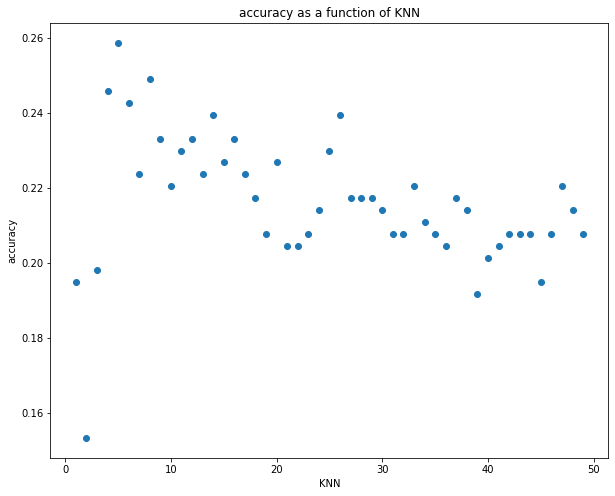

In [43]:
plt.figure(figsize=(10,8))

plt.scatter(np.arange(1,50),lst_max_knn)
plt.xlabel("KNN")
plt.ylabel("accuracy")
plt.title("accuracy as a function of KNN")

In [44]:
max_value = 0
kkn_ks = 0
count = 0
for knn_score in  lst_max_knn:
    if(knn_score > max_value):
        max_value = knn_score
        knn_ks = count + 1
    count+=1
        
print(max_value)
print(knn_ks)

0.25878594249201275
5


### We can see from our plotted graph that our best number of neigbors is 5 wich is what we had previously

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print(score)

0.25878594249201275


###  ***Below we are going to do a K cross validation*** 

#### This will help us make sure our model is reliable

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 10, shuffle = False)
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=folds)
scores.mean()

0.24949121184088807

In [47]:
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=folds)
scores 

array([0.20212766, 0.21276596, 0.25531915, 0.25531915, 0.33333333])

In [48]:
scores.mean()

0.25177304964539005

#### Above we have tryed a 5 flod and 10 flod validation as we can see it is better for us to use 5 in this case and we confirm our modle is reliable with an average of 25.17% accuracy

## is there a problem with how we have built our model? below i shall explain.

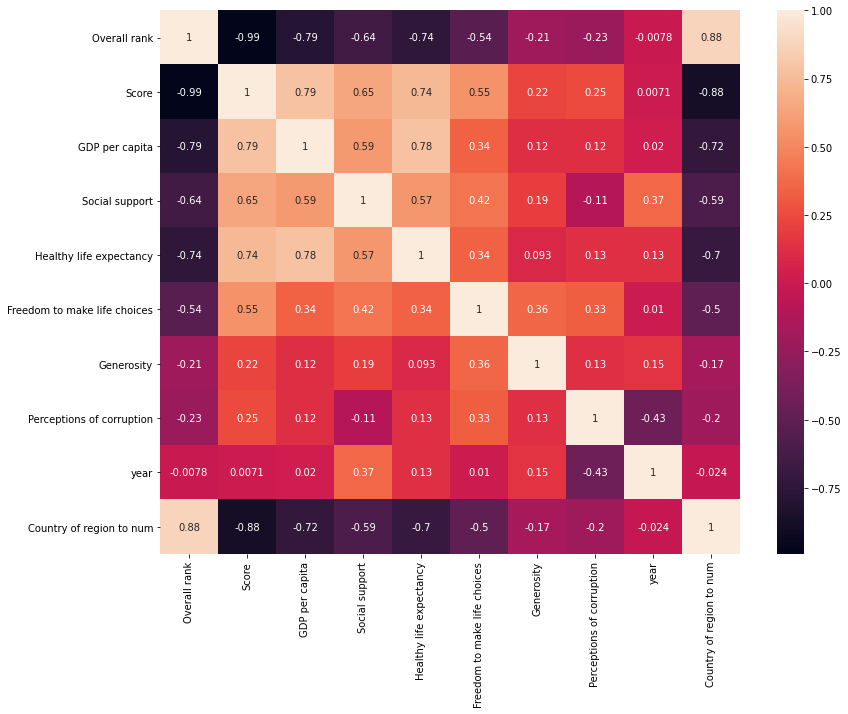

In [49]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot = True);

In [50]:

df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Country of region to num
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,1.0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,2.0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,3.0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,4.0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,5.0


## Above is our correlation heat map as well as the head of our 5 in 1 data frame.

## looking at the year column it seems the years are much bigger number wise inregards to other features. could this be messing around with our model?


# lets manually normilize the year feature and instead of using big year numbers we will replace it with 1,2,3,4,5 instead of 2015,2016,2017,2018,2019

In [51]:
df['year'].replace({2015: 1, 2016: 2, 2017: 3, 2018: 4 , 2019: 5}, inplace=True)


In [52]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Country of region to num
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,5,1.0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,5,2.0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,5,3.0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,5,4.0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,5,5.0


## ***We can see the years have been changed and if there was a problem before because of the big numbers it should now be less of an issue***

In [53]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption','Country of region to num']]
y = df['year']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print(score)

0.25878594249201275


# 25.87%

## This is the same that we got befor meaning that we do not have a problem with the numbers and there was no need to manually normalize. however it is good that we double checked

In [54]:
df['year'].replace({1: 2015, 2:2016, 3:2017, 4:2018 , 5:2019}, inplace=True)

In [106]:
X = df[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption','Country of region to num']]
y = df['year']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print(score)

0.25878594249201275


# 25.87% accuracy

## *This may not be an impressive result to show off, however i am confident that i understood the data and handled it well. also due to the correlation we were not expecting amazing results.* 

# Below we shall show the distrebution of the years of each feature and see that they are not that diffrent wich is not a huge supprise.

In [71]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Country of region to num
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,1.0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,2.0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,3.0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,4.0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,5.0


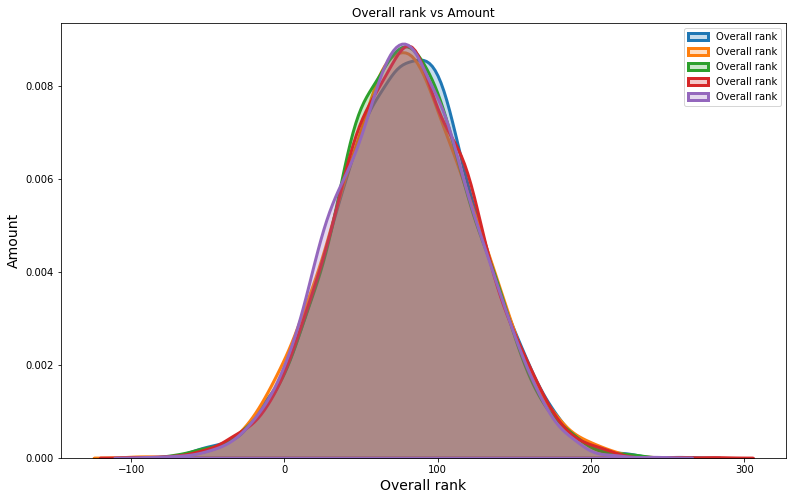

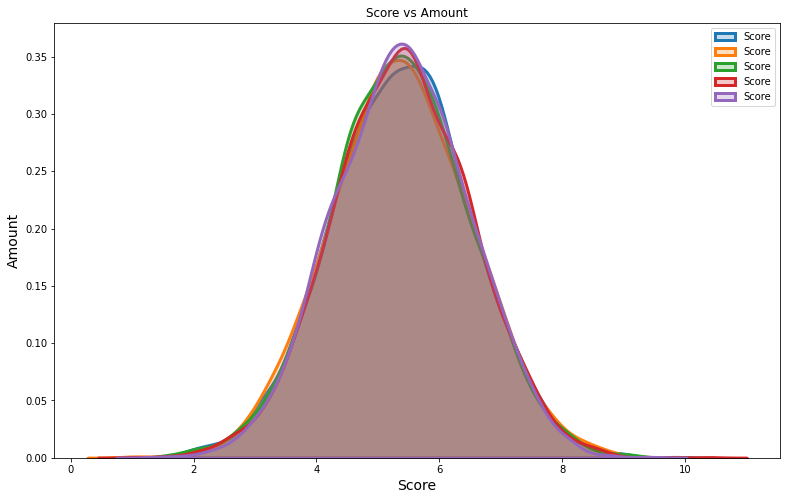

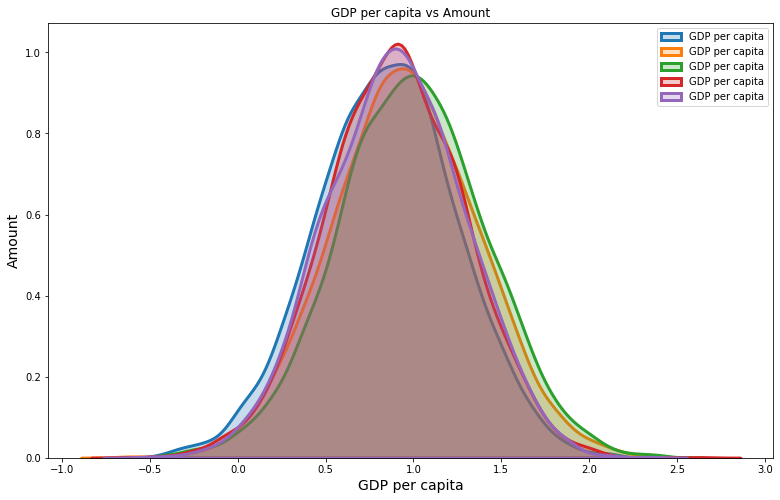

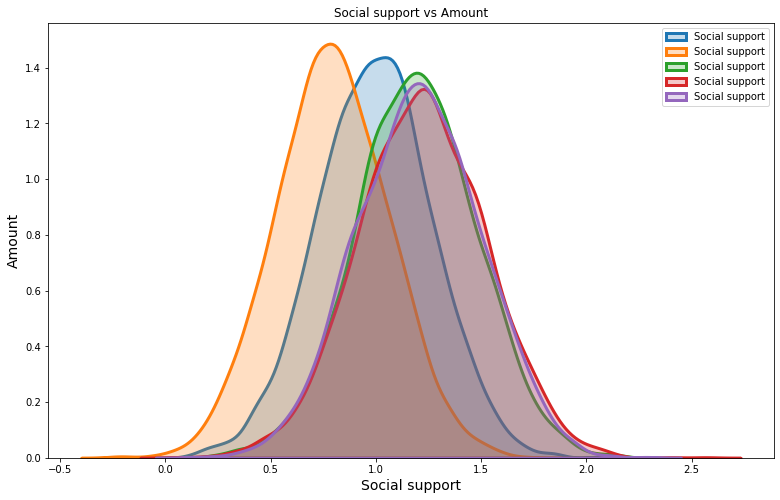

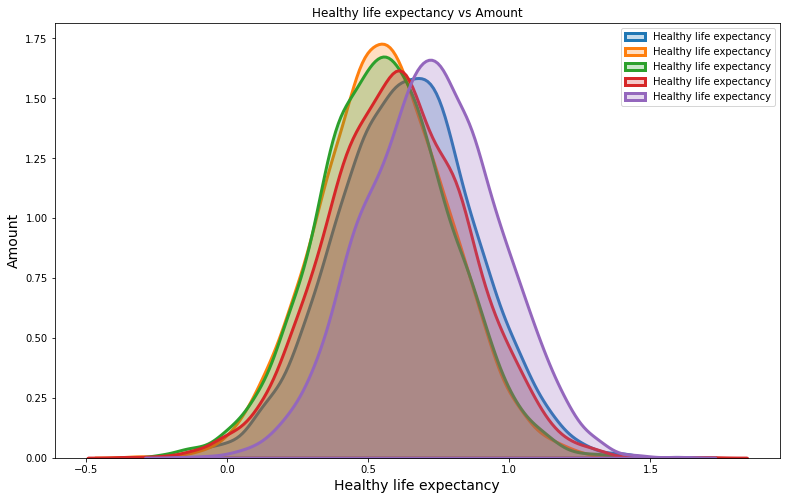

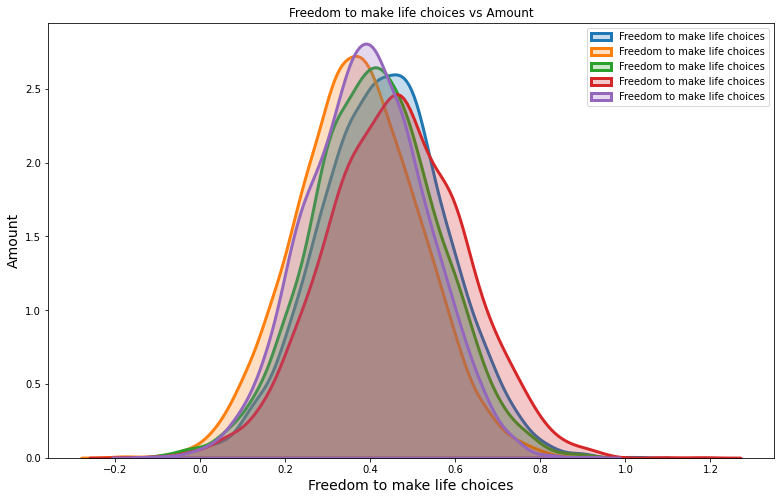

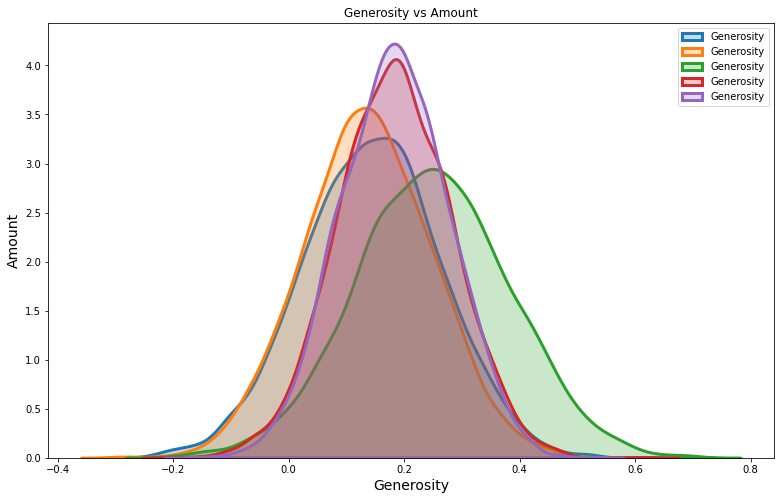

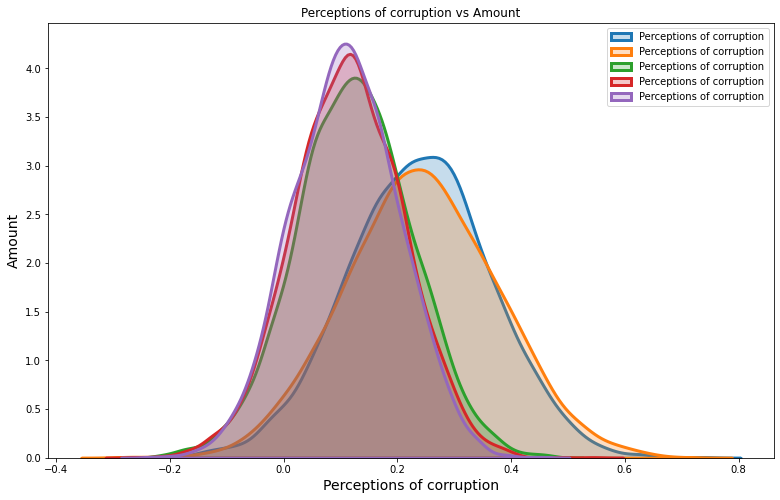

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def histogram(lst_features):
    for f in lst_features:

        # set seed for reproducing
        np.random.seed(42)
        n = 5000

        #2015
        mean_2015 = df_2015[f].mean()
        sd_2015 = df_2015[f].std()
        hist_2015 = np.random.normal(mean_2015, sd_2015, n)

        #2016
        mean_2016 = df_2016[f].mean()
        sd_2016 = df_2016[f].std()
        hist_2016 = np.random.normal(mean_2016, sd_2016, n)

        #2017
        mean_2017 = df_2017[f].mean()
        sd_2017 = df_2017[f].std()
        hist_2017 = np.random.normal(mean_2017, sd_2017, n)

        #2018
        mean_2018 = df_2018[f].mean()
        sd_2018 = df_2018[f].std()
        hist_2018 = np.random.normal(mean_2018, sd_2018, n)

        #2019
        mean_2019 = df_2019[f].mean()
        sd_2019 = df_2019[f].std()
        hist_2019 = np.random.normal(mean_2019, sd_2019, n)

        plt.figure(figsize=(13,8))
        sns.distplot(hist_2015, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3}, label = "2015")
        sns.distplot(hist_2016, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3}, label = "2016")
        sns.distplot(hist_2017, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3}, label = "2017")
        sns.distplot(hist_2018, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3}, label = "2018")
        sns.distplot(hist_2019, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3}, label = "2019")


        plt.xlabel(f, size=14)
        plt.ylabel("Amount", size=14)
        plt.title(f + " vs Amount")
        plt.legend(loc='upper right')


        
        

        
lst_fs = list(df)
lst_fs.remove('Country or region')
lst_fs.remove('Country of region to num')
lst_fs.remove('year')

histogram(lst_fs)

# Confusion matrix 

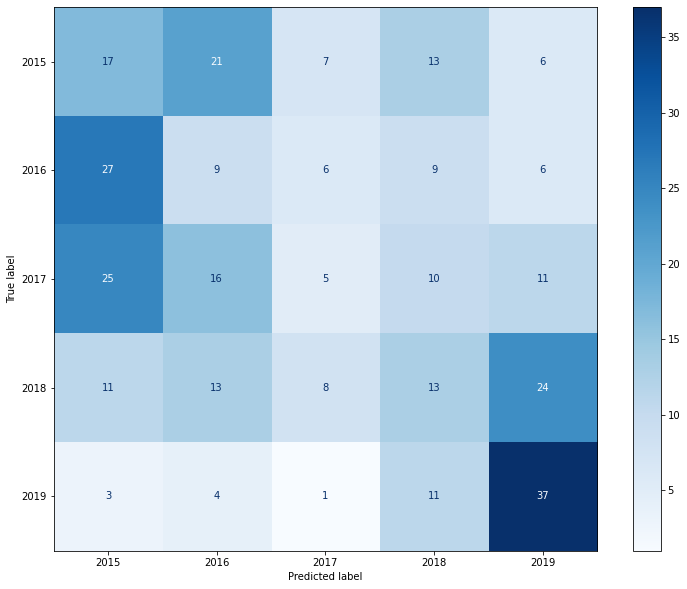

In [111]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(13, 10))
plot_confusion_matrix(classifier, X_test, y_test, ax=ax,cmap=plt.cm.Blues)


# Lets normalzie our conffusion mattrix

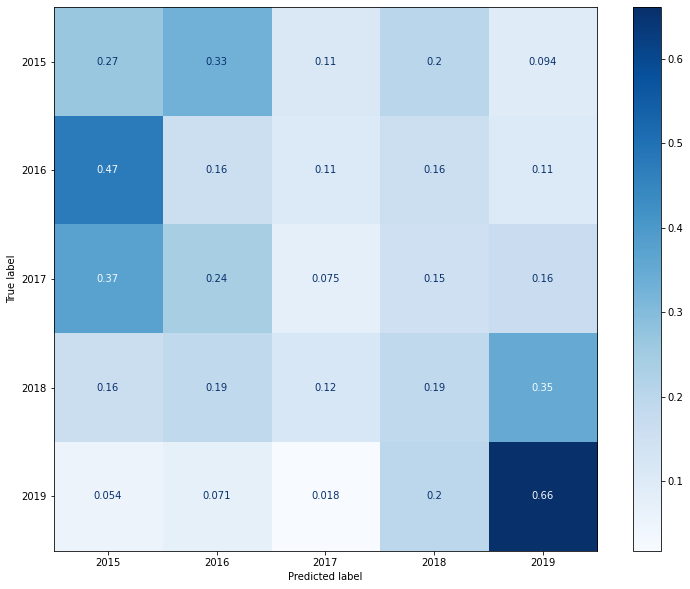

In [112]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(13, 10))
plot_confusion_matrix(classifier, X_test, y_test, ax=ax,cmap=plt.cm.Blues,normalize='true')


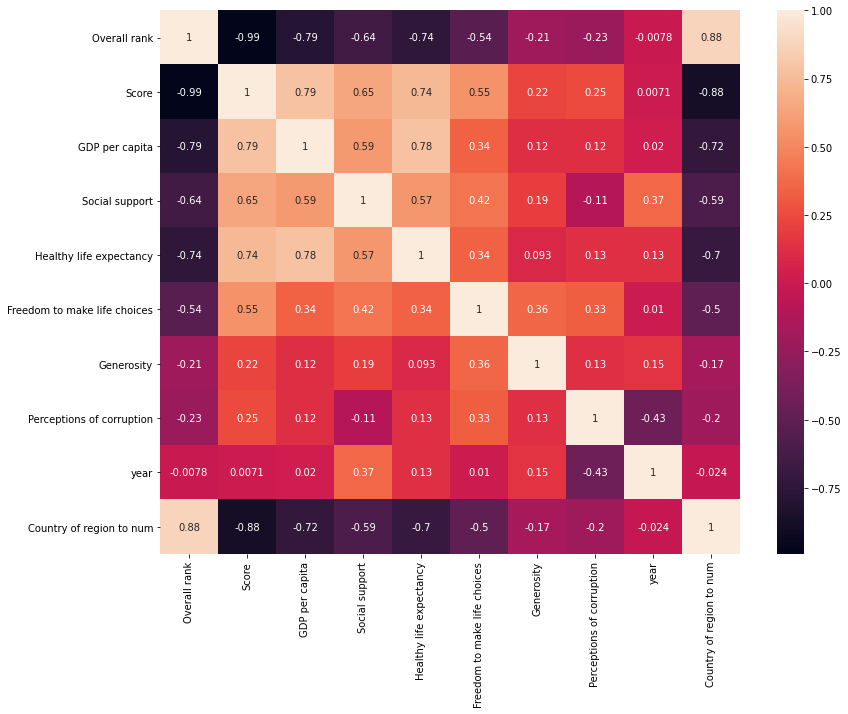

In [63]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot = True);

## ***Above we can see that social support, generosity ,Healthy life expectancy and perceptions of curruption is highly correlated with the year, therefor lets try run a quick modle with ONLY these four features***

In [129]:
X = df[['Social support', 'Perceptions of corruption','Generosity','Healthy life expectancy']]
y = df['year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print(score)

0.4504792332268371


#### Above we can see we have a 45.04% wich is higher than our current classifier 

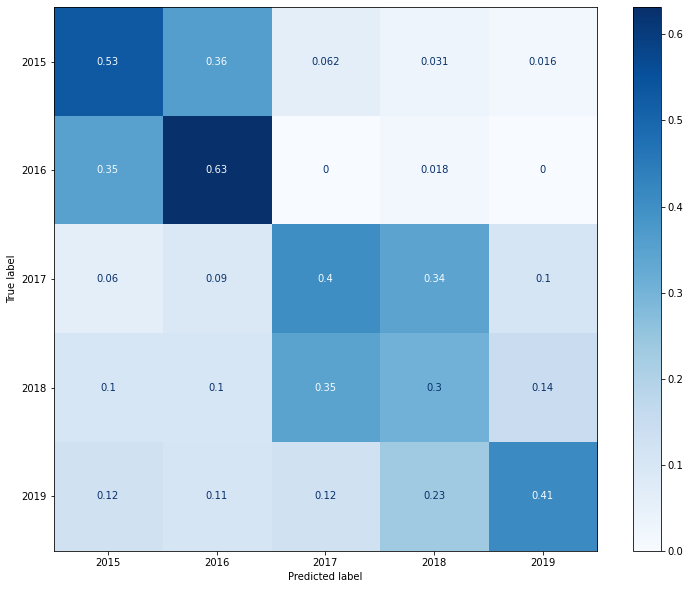

In [130]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(13, 10))
plot_confusion_matrix(classifier, X_test, y_test, ax=ax,cmap=plt.cm.Blues,normalize='true')


In [131]:
lst_max_test_size = []
for i in np.arange(0.1,1,0.01):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state = 0)

    classifier = KNeighborsClassifier(n_neighbors = 5)

    classifier.fit(X_train, y_train)

    score = classifier.score(X_test, y_test)
    
    lst_max_test_size.append(score)
    
best_test_size = 0.1
accuracy_max = max(lst_max_test_size)
for i in lst_max_test_size:
    if(i == accuracy_max):
        save = best_test_size
    best_test_size += 0.01
print(save)

0.1


In [132]:
X = df[['Social support', 'Perceptions of corruption','Generosity','Healthy life expectancy']]
y = df['year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print(score)

0.5189873417721519


In [133]:
lst_max_knn = []
for i in np.arange(1,50):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

    classifier = KNeighborsClassifier(n_neighbors = i)

    classifier.fit(X_train, y_train)

    score = classifier.score(X_test, y_test)
    
    lst_max_knn.append(score)
    
max_value = 0
kkn_ks = 0
count = 0
for knn_score in  lst_max_knn:
    if(knn_score > max_value):
        max_value = knn_score
        knn_ks = count + 1
    count+=1
        
print(max_value)
print(knn_ks)

0.5443037974683544
7


In [142]:
X = df[['Social support', 'Perceptions of corruption','Generosity','Healthy life expectancy']]
y = df['year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 7)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print(score)

0.5443037974683544


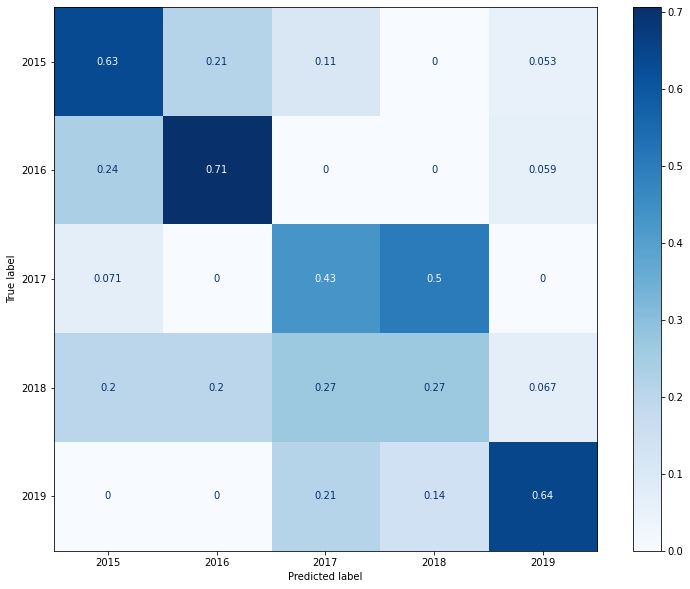

In [135]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(13, 10))
plot_confusion_matrix(classifier, X_test, y_test, ax=ax,cmap=plt.cm.Blues,normalize='true')


## Logistc regression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = df[['Country of region to num','Perceptions of corruption', 'Social support', 'Healthy life expectancy','Generosity']]
y = df['year']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train)  # apply scaling on training data


pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.


In [ ]:
from sklearn.linear_model import LogisticRegression

X = df[['Country of region to num','Perceptions of corruption', 'Social support', 'Healthy life expectancy','Generosity']]
y = df['year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 6)

model = LogisticRegression(random_state=0)

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print(score)

In [ ]:
score_lst = []
for i in np.arange(0.1,1,0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state = 0)

    model = LogisticRegression(random_state=0)

    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)

    score_lst.append(score)

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(np.arange(0.1,1,0.01),score_lst)
plt.xlabel("test size")
plt.ylabel("accuracy")
plt.title("accuracy as a function of test size")

In [ ]:
max_sc = score_lst[0]
max_i = 0.1
count = 0.1
for i in score_lst:
    if(i>max_sc):
        max_sc = i
        max_i = count
    count += 0.01
print(max_i)
print(max_sc)

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.51, random_state = 0)

model = LogisticRegression(random_state=0)

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print(score)

# End of Classification

# Regresion Model

## part two: Classification model

##### goals:
* ***importing and anaylizing data, understanding what we are working with***
* ***data cleaning***
* ***spliting the data to test and train sets***
* ***maximizing our models accuracy***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df_students = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (2)\StudentsPerformance.csv')
df_students.head(5)

In [ ]:
df_students.info


# We shall drop race/ethnicity as we have no idea what this means (The publisher of this dataset also could not give any insight)

In [ ]:
temp_lst = list(df_students)
df_students.drop([temp_lst[1]], axis=1, inplace=True)
df_students.head(5)

## ***Let us see the correlation heatmap***

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_students.corr(), annot = True);

## it seems like our correlations can only indentify the scores, we will have to manually change data to numrical values.

In [ ]:
df_students['male'] = df_students.gender.map({'female':0, 'male':1})
df_students.head()

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_students.corr(), annot = True);



In [ ]:
df_students.head(10)
df_students.groupby(['lunch']).count()


In [ ]:

df_students['lunch_cost'] = df_students.lunch.map({'standard':1, 'free/reduced':0})
df_students.head(5)

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_students.corr(), annot = True);

In [ ]:
#much better

In [ ]:
df_students.groupby(['test preparation course']).count()

In [ ]:
#we can see there are two types of lunch people so we will also try and make these values numric
df_students['preparation_status'] = df_students['test preparation course'].map({'completed':1 , 'none':0})

df_students.head(5)

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_students.corr(), annot = True);

## We have mapped above the lunch, gender and preperation to numric values

In [ ]:
df_students.groupby(['parental level of education']).count()

In [ ]:
df_students['parents_education'] = df_students['parental level of education'].map({'some high school':1 , 'high school':2, 'some college':3, 'bachelor\'s degree': 4, 'associate\'s degree':5, 'master\'s degree':6})
df_students.head(5)

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_students.corr(), annot = True);

## ***We have mapped above the parent educaion level to 6 numric values***

# well done! we can see all the corrolations above 

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df_students['math score'], bins=100, alpha=0.3, label="Maths score", facecolor ='r')
plt.xlabel("Score", size=14)
plt.ylabel("Dencity", size=14)
plt.title("distrbution of scores")
plt.legend(loc='upper right')

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df_students['reading score'], bins=100, alpha=0.3, label="Reading score", facecolor = 'm')
plt.xlabel("Score", size=14)
plt.ylabel("Dencity", size=14)
plt.title("distrbution of scores")
plt.legend(loc='upper right')


In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df_students['writing score'], bins=100, alpha=0.3, label="Writing score", facecolor = 'g')
plt.xlabel("Score", size=14)
plt.ylabel("Dencity", size=14)
plt.title("distrbution of scores")
plt.legend(loc='upper right')


In [ ]:
plt.figure(figsize=(13,8))

plt.hist(df_students['math score'], bins=100, alpha=0.3, label="Maths score", facecolor ='r')
plt.hist(df_students['reading score'], bins=100, alpha=0.3, label="Reading score", facecolor = 'm')
plt.hist(df_students['writing score'], bins=100, alpha=0.3, label="Writing score", facecolor = 'g')
plt.xlabel("Score", size=14)
plt.ylabel("Dencity", size=14)
plt.title("distrbution of scores")
plt.legend(loc='upper right')


# ***Above we have shown the distrebution of scores for maths , reading and wrighting as well ass together via histograms***

In [ ]:
df_students.head()

### Above we have double checked our data and have verified our numric changes

In [ ]:
X = df_students[['male','parents_education','lunch_cost','preparation_status','math score','reading score']]
y = df_students['writing score']

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#standard 20 %

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modle = LinearRegression()
modle.fit(X_train, y_train)

score = modle.score(X_test, y_test)

print(score)

# Important anaylis

## ***Above we have split our data in to training and testing sets (using the standard 20/80) we have difined a modle of the type liner regresion and fit our modle with our training sets accordingly ***

# ***Our model currently predicts with an accuracy score of 94.06% (our model estimates the writing score)***

In [ ]:
joshua = [[1,6,1,1,90,50]]
print(modle.predict(joshua))
#prediction for me

In [ ]:
modle.coef_

### ***above our our modles coef's also known as weights***

## Above is a template of me and our model predicts i would recive a 58.92 in a writing test

# Lets try improve this, lets find the best test size for our model 

In [ ]:
lst_max_test_size = []
for i in np.arange(0.1,1,0.05):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state = 0)

    modle = LinearRegression()
    modle.fit(X_train, y_train)

    score = modle.score(X_test, y_test)
    
    lst_max_test_size.append(score)
    


In [ ]:
plt.figure(figsize=(13,8))

plt.scatter(np.arange(0.1,1,0.05),lst_max_test_size)
plt.xlabel("test size")
plt.ylabel("accuracy")
plt.title("accuracy as a function of test size")

## ***It seems like at a 45/55 split test we would get the best results , lets try this***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state = 0)

modle = LinearRegression()
modle.fit(X_train, y_train)

score = modle.score(X_test, y_test)
    
print(score)

### ***Our modle has improved by around 0.3% but we have compromized and it is better practice to use the 20/80 we shall therefor go back to that as it hass not been worth it***



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

modle = LinearRegression()
modle.fit(X_train, y_train)

score = modle.score(X_test, y_test)
    
print(score)

# K cross validation

### ***We want to validate that our model will be accurat on data it has not yet seen. One way of doing this is K cross validation where we will split our data randomly in to k amounts of "Folds" usally 5 or 10.***

### ***this gives us a good estimate about the accuracy of our model***

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(modle, X_train, y_train, scoring='r2', cv=folds)
scores   

#### ***Above we have split the data in to 5 k folds and we shall now take the average of these five results wich will be a good estimate of our models accuracy***

In [ ]:
scores.mean()

### ***Below we hsall try with 10 k folds***

In [ ]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(modle, X_train, y_train, scoring='r2', cv=folds)
scores   

In [ ]:
scores.mean()

#### We can see a better indicator would be k = 5 for our folds and we can confirm our modle is reliable with an average of 93.69% accuracy

# The End